In [14]:
pip install researchpy

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import researchpy as rp
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols

In [5]:
bike_sharing_data=pd.read_csv("/content/day.csv")

In [6]:
bike_sharing_data=bike_sharing_data[["season","mnth","holiday","workingday","weathersit","temp","cnt"]]

In [7]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [8]:
bike_sharing_data.shape

(731, 7)

In [9]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   workingday  731 non-null    int64  
 4   weathersit  731 non-null    int64  
 5   temp        731 non-null    float64
 6   cnt         731 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.1 KB


In [10]:
bike_sharing_data["weathersit"].unique()

array([2, 1, 3])

weathersit is the column which have three different categorical value thus we can use this column to do anova test as opposed to t-test which is used to compare just two groups of sample

In [11]:
bike_sharing_data.groupby("weathersit")["cnt"].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


Count of bikes rented as per weathersituation are very different among each group.Similarly the mean and median of the numberof bikes rented is also different but we want to test how significant these differences are.One way ANOVA will tell us this

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


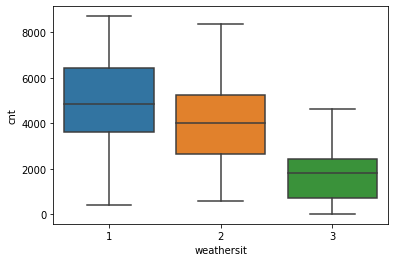

In [13]:
sns.boxplot(bike_sharing_data["weathersit"],bike_sharing_data["cnt"])

medians of the three categories are very different and they have different spread also.

In [22]:
f_oneway(bike_sharing_data[bike_sharing_data["weathersit"]==1]["cnt"],
         bike_sharing_data[bike_sharing_data["weathersit"]==2]["cnt"],
         bike_sharing_data[bike_sharing_data["weathersit"]==3]["cnt"])

F_onewayResult(statistic=40.06604492024684, pvalue=3.106317270053755e-17)

- p-value indicates that the differences in the mean between these three categories or samples are significant. The weather situation on a particular day does have an impact on the count of bikes rented on that day
- one way annova tells us that the means are different but it does not tells which group has different mean as compared to other groups
- for this we will use tukey's Honest significant difference test.It tell which specific group has different mean

In [26]:
from statsmodels.stats.multicomp import MultiComparison
multi_comp=MultiComparison(bike_sharing_data["cnt"],bike_sharing_data["weathersit"])
multi_comp_result=multi_comp.tukeyhsd()


In [27]:
print(multi_comp_result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
     1      2  -840.9238 0.001  -1181.639  -500.2086   True
     1      3 -3073.5005 0.001 -4038.2706 -2108.7304   True
     2      3 -2232.5766 0.001 -3215.4794 -1249.6738   True
-----------------------------------------------------------


## Two way ANOVA
two way anova examines the influence of the two different categorical variable on one continous independent variable
- we will use two categorical variables
  - weather situation and season

In [28]:
bike_sharing_data["weathersit"].unique()

array([2, 1, 3])

In [29]:
bike_sharing_data["season"].unique()

array([1, 2, 3, 4])

In [30]:
rp.summary_cont(bike_sharing_data.groupby("weathersit")["cnt"])

,N,Mean,SD,SE,95% Conf.,Interval
weathersit,,,,,,
1,463,4876.7862,1879.4840,87.3470,4705.1395,5048.4329
2,247,4035.8623,1809.1099,115.1109,3809.1337,4262.5910
3,21,1803.2857,1240.2844,270.6523,1238.7150,2367.8564


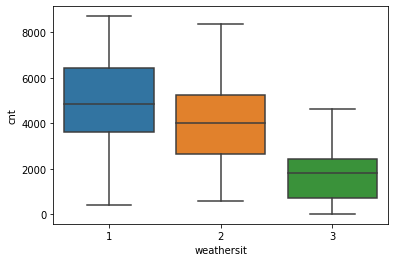

In [31]:
sns.boxplot(bike_sharing_data["weathersit"],bike_sharing_data["cnt"])

In [33]:
rp.summary_cont(bike_sharing_data.groupby("season")["cnt"])

,N,Mean,SD,SE,95% Conf.,Interval
season,,,,,,
1,181,2604.1326,1399.9421,104.0569,2398.8044,2809.4608
2,184,4992.3315,1695.9772,125.0291,4745.6476,5239.0154
3,188,5644.3032,1459.8004,106.4669,5434.2727,5854.3337
4,178,4728.1629,1699.6153,127.3915,4476.7612,4979.5647


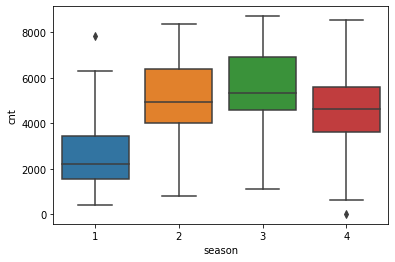

In [35]:
sns.boxplot(bike_sharing_data["season"],bike_sharing_data["cnt"])

both the box plots show that across the different seasons and weather situations the number of bikes rented are very different. 
- means of bike rented are different for different weather situations this we have already proved

- to perform two-way ANOVA analysis, we'll first run some regression analysis on our data on the count of bikes shared versus the weather situation

In [75]:
model=ols("cnt~C(weathersit)",bike_sharing_data).fit()


In [76]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     40.07
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           3.11e-17
Time:                        18:58:39   Log-Likelihood:                -6531.5
No. Observations:                 731   AIC:                         1.307e+04
Df Residuals:                     728   BIC:                         1.308e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4876.7862     85

- The R-squared and the adjusted R-squared values are fairly low here, indicating that the regression wasn't great.
- Whether this regression was significant or not is given by the f-statistic for the regression and the corresponding p-value. With a very small p-value under the 5% threshold, we know this regression is significant
- The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.
- the p-value for every variable and intercept is less than 0.05% which implies that every variable in the regression is significant(The null hypothesis is that the coefficient should be equal to 0, that is the variable is not significant. With a p-value equal to 0, we can reject the null hypothesis.)


we perform the same regression for other categorical variable

In [77]:
model=ols("cnt~C(season)",bike_sharing_data).fit()


In [78]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           6.72e-67
Time:                        18:59:14   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2604.1326    116.598     22.

- The R-squared and the adjusted R-squared values are significant here, indicating that the regression was fairly descent.
- Whether this regression was significant or not is given by the f-statistic for the regression and the corresponding p-value. With a very small p-value under the 5% threshold, we know this regression is significant
- The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.
- the p-value for every variable and intercept is less than 0.05% which implies that every variable in the regression is significant(The null hypothesis is that the coefficient should be equal to 0, that is the variable is not significant. With a p-value equal to 0, we can reject the null hypothesis.)

Lets do regression analysis considering weather situation and season

In [79]:
model=ols("cnt~C(weathersit)+C(season)",bike_sharing_data).fit()
# + sign indicates that two categorical variables are independent ie no interaction between them

In [80]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           1.13e-87
Time:                        18:59:50   Log-Likelihood:                -6360.4
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     725   BIC:                         1.276e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2931.9780    116

- The R-squared and the adjusted R-squared values are significant here, indicating that the regression was fairly descent.
- Whether this regression was significant or not is given by the f-statistic for the regression and the corresponding p-value. With a very small p-value under the 5% threshold, we know this regression is significant
- The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.
- Observe that the regression variable coefficients now include coefficients for the weather situation, as well as the season, and all of these coefficients are significant, since p-value for every variable and intercept is less than 0.05% which implies that every variable in the regression is significant(The null hypothesis is that the coefficient should be equal to 0, that is the variable is not significant. With a p-value equal to 0, we can reject the null hypothesis.)

In [81]:
# Lets do ANOVA on the three models that we have 
# when using model with one categorical variable its one way annova 
# when using model with two categorical variable its two way annova
from statsmodels.stats.anova import anova_lm
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,63.717757,3.218999e-26
C(season),3.0,9.224636e+08,3.074879e+08,144.250530,2.702818e-73
Residual,725.0,1.545427e+09,2.131624e+06,NaN,NaN


- for each of categorical variables our two-way ANOVA analysis tells us that the differences in the means between the categories are significant.
-  A p-value which is very close to 0 indicates that the differences in the means between the different categories of weather situation is significant, and the same is true for the different seasons as well. 
- Our two-way ANOVA analysis makes it very clear here that both the weather situation, as well as the season affect the number of bikes shared

In [85]:
# We also want to consider the interaction between these two categorical features.
# Let's take a quick look at the results of this regression
model=ols("cnt~C(weathersit)*C(season)",bike_sharing_data).fit()
# * sign indicates that two categorical variables are interacting with each other

In [86]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     52.85
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           5.25e-85
Time:                        19:11:08   Log-Likelihood:                -6353.1
No. Observations:                 731   AIC:                         1.273e+04
Df Residuals:                     719   BIC:                         1.279e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

- Here are the R-squared values and the f-statistic showing us that the regression is significant. 
- we have many more regression variables. Here are the regression variables which consider the individual weather situation categories, as well as the individual seasons, and because we've taken into account the interaction between these two variables in this regression, here are the coefficients corresponding to the interaction variables.
- the p-values of these regression coefficients tell us that some of these interactions may not be significant, but others are. 
- There are two p-values here under 5%. Those interaction coefficients are significant.

In [83]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(weathersit),2.0,2.716446e+08,1.358223e+08,64.469065,1.766520e-26
C(season),3.0,9.224636e+08,3.074879e+08,145.951415,7.347364e-74
C(weathersit):C(season),6.0,3.065076e+07,5.108460e+06,2.424769,2.505746e-02
Residual,719.0,1.514776e+09,2.106782e+06,NaN,NaN


- ANOVA analysis prints out whether the differences in the means of the individual categories are significant. We know that they are
- this two-way ANOVA also very clearly tells us that the interaction between the weather situation and season categorical variable is significant.

## Chi Square Analysis

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [105]:
data=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv",engine="python" ,index_col=0)

In [109]:
#subsetting the dataset for my convinience
data=data[["Clothing ID","Age","Rating","Recommended IND","Positive Feedback Count","Division Name","Department Name","Class Name"]]

In [110]:
data.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21649,1008,53,4,1,3,General Petite,Bottoms,Skirts
11570,862,41,2,0,1,General,Tops,Knits
13241,167,44,5,1,0,General,Bottoms,Shorts
22018,864,44,5,1,2,General Petite,Tops,Knits
14835,929,40,3,1,4,General,Tops,Sweaters
5801,818,25,5,1,3,General,Tops,Blouses
18978,960,29,4,1,1,General,Jackets,Jackets
33,949,36,2,0,0,General,Tops,Sweaters
22936,1107,48,5,1,1,General Petite,Dresses,Dresses
1390,1083,38,2,0,4,General Petite,Dresses,Dresses


In [111]:
data.shape

(23486, 8)

We'll perform a chi-squared analysis to see whether the recommendations made by the e-commerce site are independent of the ratings associated with the product

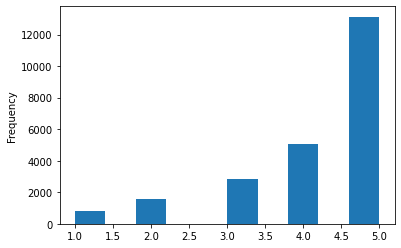

In [112]:
data["Rating"].plot(kind="hist")

In [117]:
tabs=pd.crosstab(data["Recommended IND"],data["Rating"])

In [118]:
tabs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13106


The chi2_contingency function in the scipy library calculates the Pearson's chi-squared statistic to test for the independence of two categorical variables. 

In [120]:
chi2,p_value,dof,expected_values=chi2_contingency(tabs)

In [121]:
expected_values

array([[  149.57097846,   278.00306566,   509.99795623,   901.86681427,
         2332.56118539],
       [  692.42902154,  1286.99693434,  2361.00204377,  4175.13318573,
        10798.43881461]])

- We are trying to determine that are recommendations made by the e-commerce site independent of the ratings associated with the individual products.
- We have two categories of products, recommended and not recommended.
- The chi-squared test will see the observed frequencies of ratings across these two different categories and see whether these observed frequencies for recommended products, as well as not recommended products, match the expected frequency. 
- The expected frequency is the frequency distribution of ratings across the entire dataset. 
- The expected_values fromm the chi2_contingency test  give you how chi-squared expects that the data will be distributed if the recommended and the not recommended categorical values were independent of the ratings

In [124]:
print("Chi2 Statistic     :",chi2)
print("p-value            :",p_value)
print("Dergree of freedom :",dof)
print("Expected frequency :",expected_values)

Chi2 Statistic     : 16722.503172306744
p-value            : 0.0
Dergree of freedom : 4
Expected frequency : [[  149.57097846   278.00306566   509.99795623   901.86681427
   2332.56118539]
 [  692.42902154  1286.99693434  2361.00204377  4175.13318573
  10798.43881461]]


- p_value of 0 implies that the test was significant and that the recommendations of products depends upon star ratings
- Significant test means the distribution as seen in the data(data across individual category)was very different from the expected distribution(distribution across whole dataset) for the recommended and not recommended products.
- degrees of freedom is equal to 4. That is typically the number of categories that we're working with minus 1.

In [125]:
expected_values

array([[  149.57097846,   278.00306566,   509.99795623,   901.86681427,
         2332.56118539],
       [  692.42902154,  1286.99693434,  2361.00204377,  4175.13318573,
        10798.43881461]])

- Based on the ratings across the entire dataset, the expected_values tells us how chi-squared expected that the data will be distributed for both the recommended, as well as the not recommended products.
- The first row is the expected distribution for the not recommended products, and the second for the recommended products

In [139]:
# lets cretae a DataFrame out of expected values
expected_df=pd.DataFrame({"Not Recommended":expected_values[0],"Recommended":expected_values[1]})

In [140]:
expected_df

,Not Recommended,Recommended
0,149.570978,692.429022
1,278.003066,1286.996934
2,509.997956,2361.002044
3,901.866814,4175.133186
4,2332.561185,10798.438815


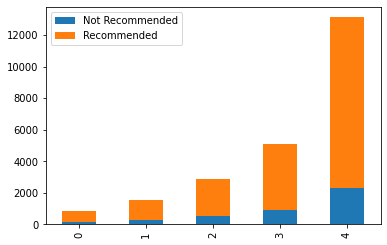

In [141]:
expected_df.plot(kind="bar",stacked=True)

- observe the shape of this bar plot is very similar to the shape of the ratings distribution histogram
- the chi-squared analysis expected that across recommended and not recommended products this is how the ratings would be distributed

### Now lets see how observed distribution of ratings looks like

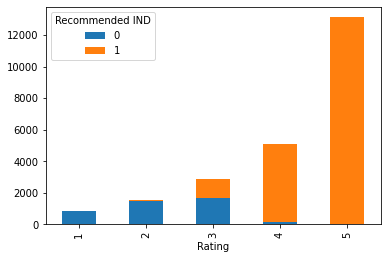

In [156]:
tabs.T.plot(kind="bar",stacked=True)

- the shape of this barchart shows that mostly 3+ rated products tend to be recommended. 
- There are very few products with just 1 and 2-star ratings that are recommended by the site. 
- products that were not recommended by the site mostly tend to have lower ratings, 1 and 2-star products
- Our chi-squared analysis compared this observed distribution versus the expected distribution and found it very different. 
This clearly tells you that the e-commerce site's recommendations are not independent of the ratings of products.

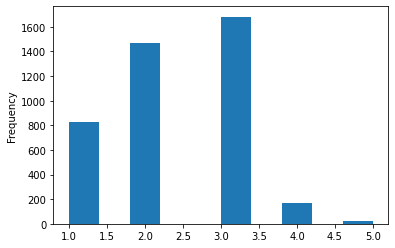

In [158]:
data[data["Recommended IND"]==0]["Rating"].plot(kind="hist")

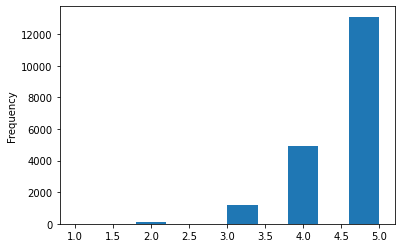

In [159]:
data[data["Recommended IND"]==1]["Rating"].plot(kind="hist")

- we can see that the products that are not recommended have low ratings thus recommendation are influnced by ratings
- we can see that the products that are recommended have high ratings(3+) thus recommendation are influnced by ratings
- this is what our chi square test told us